In [9]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [18]:
#import excel file
df=pd.read_excel(r'C:\Users\88017\git\project_Loan Approval prediction\loan.xlsx')

In [19]:
#return first 10 rows of df dataframe
df.head(10)

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   
6             2333             1516.0        95.0             360.0   
7             3036             2504.0       158.0             360.0   
8             4006             1526.0       168.0             360.0   
9            12841            10968.0       349.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y  
5             1.0         Urban           Y  
6             1.0         Urban           Y  
7             0.0     Semiurban           N  
8             1.0         Urban           Y  
9             1.0     Semiurban           N

In [20]:
#give details as summary of whole df dataframe including rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [22]:
#check for null values in df dataframe
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

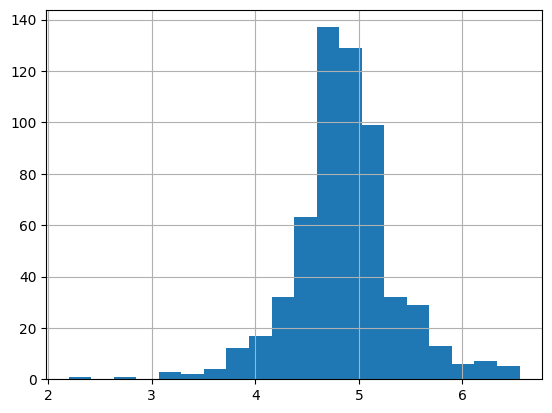

In [32]:
#create a new column in the DataFrame df named as'loanAmount_log' column which contains the natural logarithm of the values in the LoanAmount column.
#Then create a histogram of the loanAmount_log column which contains logarithm-transformed loan amounts.
df['loanAmount_log']=np.log(df['LoanAmount'])
df['loanAmount_log'].hist(bins=20)

<Axes: >

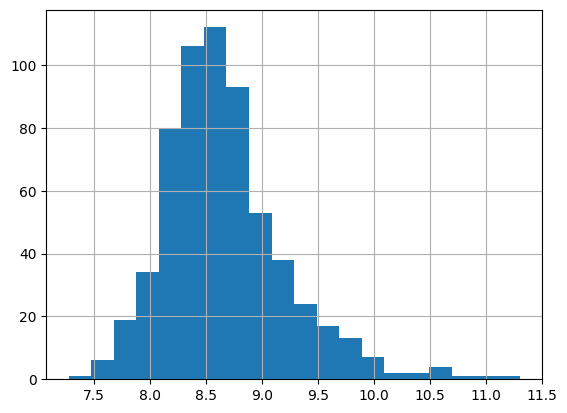

In [33]:
#build 2 new columns of 'TotalIncome' and 'TotalIncome_log' in df dataframe and then make a histogram of TotalIncome_log column
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [34]:

#check number of null values in every column on df dataframe
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log       22
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [39]:
#For the categorical columns Gender, Married, Self_Employed, Loan_Amount_Term, Credit_History and Dependents, the missing values are filled with the mode (the most frequent value) of the respective columns. 
df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Dependents'].fillna(df['Dependents'].mode()[0])
#For the numerical columns LoanAmount and LoanAmount_log, the missing values are filled with the mean value of the respective columns.
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log=df.loanAmount_log.fillna(df.loanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'].fillna(df['Credit_History'].mode()[0])
#check number of null values in every column on df dataframe
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [68]:
#Select columns 1 to 4, 9 to 10, and 13 to 14
x=df.iloc[:, np.r_[1:5,9:11,13:15]].values
#selecting all values from the 12th column which is Loan_Status
y=df.iloc[:, 12].values

#Display all columns from 1 to 4, 9 to 10, and 13 to 14
x

array([['Male', 'No', 0, ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', 1, ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', 0, ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', 1, ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', 2, ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', 0, ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [69]:
# Display all values from the 12th column which is Loan_Status
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

Number of people who take loan based on gender:
Gender
Male      502
Female    112
Name: count, dtype: int64


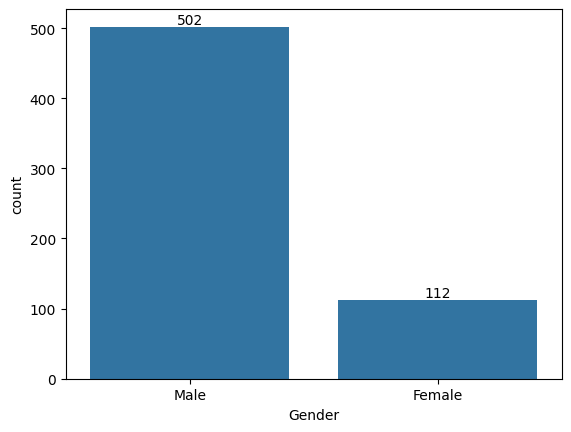

In [91]:
#show number of people based on gender taking loans in both numerical value and barchart
print("Number of people who take loan based on gender:")
print(df['Gender'].value_counts())
data=sns.countplot(x='Gender', data=df)

for bars in data.containers:
    data.bar_label(bars)

Number of people who take loan based on married status:
Married
Yes    401
No     213
Name: count, dtype: int64


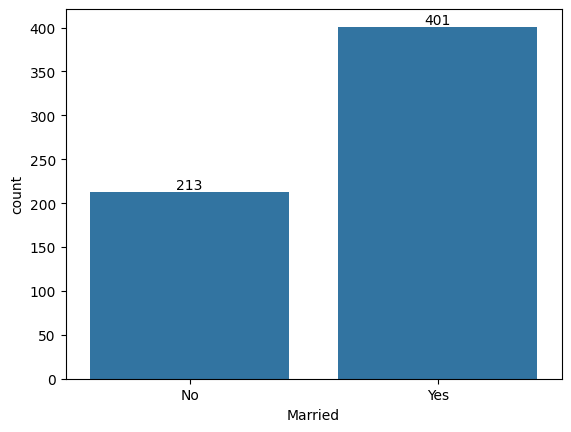

In [90]:
#show number of people based on married status taking loans in both numerical value and barchart
print("Number of people who take loan based on married status:")
print(df['Married'].value_counts())
data=sns.countplot(x='Married', data=df)

for bars in data.containers:
    data.bar_label(bars)

Number of people who take loan based on dependents:
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


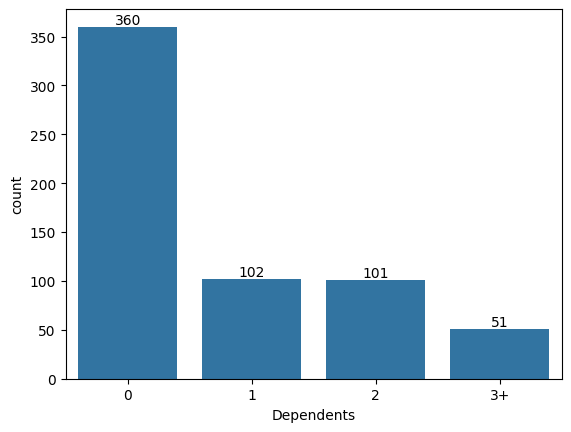

In [89]:
#show number of people who take loan based on dependents in both numerical value and barchart
print("Number of people who take loan based on dependents:")
print(df['Dependents'].value_counts())
data=sns.countplot(x='Dependents', data=df)

for bars in data.containers:
    data.bar_label(bars)

Number of people who take loan based on self employed status
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


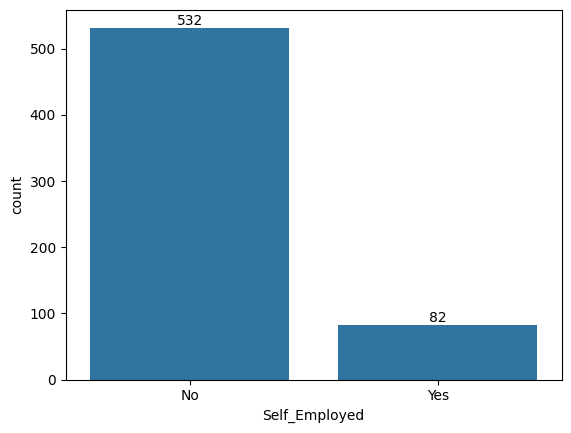

In [88]:
#show number of people who take loan based on self employed status in both numerical value and barchart
print("Number of people who take loan based on self employed status")
print(df['Self_Employed'].value_counts())
data=sns.countplot(x='Self_Employed', data=df)

for bars in data.containers:
    data.bar_label(bars)

Number of people who take loan based on loan amount
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
187.000000    12
              ..
292.000000     1
142.000000     1
350.000000     1
496.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


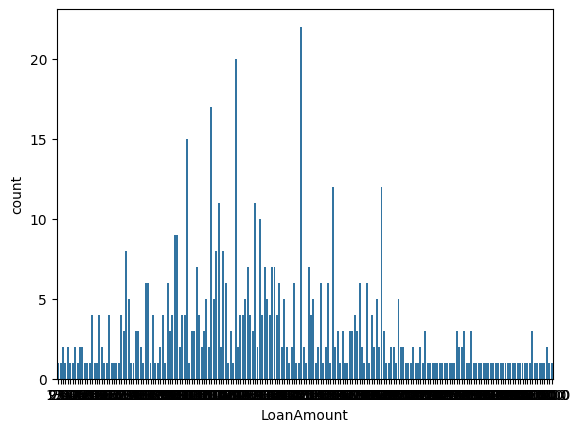

In [87]:
#show number of people who take loan based on loan amount in both numerical value and bar graph form
print("Number of people who take loan based on loan amount")
print(df['LoanAmount'].value_counts())
data=sns.countplot(x='LoanAmount', data=df)



Number of people who take loan based on credit history:
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


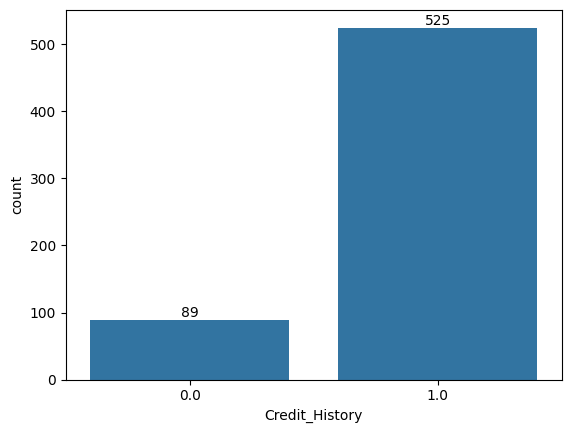

In [92]:
#show number of people based on credit history taking loans in both numerical value and barchart
print("Number of people who take loan based on credit history:")
print(df['Credit_History'].value_counts())
data=sns.countplot(x='Credit_History', data=df)

for bars in data.containers:
    data.bar_label(bars)

In [139]:
from sklearn.model_selection import train_test_split
#train_test_split function is used to split arrays or matrices into random train and test subsets.
#test_size=0.2: This specifies that 20% of the data should be used for the test set and the remaining 80% for the training set.
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2, random_state=0)

from sklearn.preprocessing import LabelEncoder
Labelencoder_x=LabelEncoder()

In [178]:
#This loop iterates through the column indices from 0 to 4 
for i in range(0,5):
     #This converts the entire column i in the X_train array to strings.
     X_train[:, i] = X_train[:, i].astype(str)
     #This encodes the string values in column i using LabelEncoder, transforming them into numerical values.
     X_train[:, i] = Labelencoder_x.fit_transform(X_train[:, i])
    
     
#This converts column 7 to strings and then encodes it with LabelEncoder
X_train[:, 7] = X_train[:, 7].astype(str)
X_train[:, 7] = Labelencoder_x.fit_transform(X_train[:, 7])

X_train

array([[ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         4.17900883e-01,  3.48479808e-02,  2.61000000e+02],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         4.17900883e-01,  8.31020780e-01,  7.90000000e+01],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -2.39291191e+00,  2.89258573e-01,  2.41000000e+02],
       ...,
       [ 1.00000000e+00,  1.00000000e+00,  3.00000000e+00, ...,
         4.17900883e-01,  8.70941738e-01,  3.70000000e+02],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         4.17900883e-01,  4.30005571e-01,  2.67000000e+02],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         4.17900883e-01,  6.84581930e-01,  2.99000000e+02]])

In [179]:

Labelencoder_y=LabelEncoder()
#It converts the original categorical values in Y_train into numerical values
Y_train=Labelencoder_y.fit_transform(Y_train)

Y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [180]:
#This loop iterates through the column indices from 0 to 4 
for i in range(0,5):
     #This converts the entire column i in the X_train array to strings.
     X_test[:, i] = X_test[:, i].astype(str)
     #This encodes the string values in column i using LabelEncoder, transforming them into numerical values.
     X_test[:, i] = Labelencoder_x.fit_transform(X_test[:, i])
    
     
#This converts column 7 to strings and then encodes it with LabelEncoder
X_test[:, 7] = X_test[:, 7].astype(str)
X_test[:, 7] = Labelencoder_x.fit_transform(X_test[:, 7])

X_test

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.00000000e+00,  3.86694596e-01,
        -9.44182815e-01,  9.60000000e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.00000000e+00,  3.86694596e-01,
        -3.06802355e-01,  1.00000000e+02],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.00000000e+00,  3.86694596e-01,
         2.04667756e+00,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.00000000e+00,  3.86694596e-01,
        -3.46723659e-01,  3.70000000e+01],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         0.00000000e+00,  4.00000000e+00,  3.86694596e-01,
        -6.25374842e-01,  9.20000000e+01],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  2.00000000e+00, -2.58602011e+00,
         5.51613645e-01,  1.30000000e+01],
       [ 1.00000000e+00,  1.000000

In [181]:
#This line creates an instance of the LabelEncoder class, which will be used to encode the target variable.
Labelencoder_y=LabelEncoder()
#It converts the original categorical values in Y_test into numerical values
Y_test=Labelencoder_y.fit_transform(Y_test)

Y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [182]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

#Fit: It computes the mean and standard deviation of X_train for each feature.
#Transform: It standardizes the data by subtracting the mean and dividing by the standard deviation for each feature.
#After this step, X_train will have a mean of 0 and a standard deviation of 1 for each feature.
X_train=ss.fit_transform(X_train)
#This line applies the same transformation to X_test. However, it uses the fit parameters (mean and standard deviation) computed from X_train. 
X_test=ss.fit_transform(X_test)

In [183]:
from sklearn.ensemble import RandomForestClassifier


rf_clf=RandomForestClassifier()

#This line trains the Random Forest classifier using the training data X_train and the corresponding labels Y_train. 
#The fit method builds multiple decision trees based on the training data.
rf_clf.fit(X_train,Y_train)

RandomForestClassifier()

In [184]:
from sklearn import metrics

#y_pred = rf_clf.predict(X_test): 
#This line generates the predicted labels for the test data X_test using the trained Random Forest classifier rf_clf
y_pred=rf_clf.predict(X_test)

#metrics.accuracy_score(Y_test, y_pred): 
#This function calculates the accuracy of the predictions by comparing the predicted labels (y_pred) to the true labels (Y_test).
print("accuracy of random forest clf is %.", metrics.accuracy_score(y_pred,Y_test))

y_pred

accuracy of random forest clf is %. 0.7398373983739838


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [185]:
from sklearn.naive_bayes import GaussianNB

nb_classifier=GaussianNB()
#The fit method trains the Naive Bayes classifier using the training data X_train and the corresponding labels Y_train
nb_classifier.fit(X_train,Y_train)

GaussianNB()

In [186]:
#nb_classifier.predict(X_test): 
#This line uses the trained Naive Bayes classifier (nb_classifier) to make predictions on the test data (X_test)
y_pred=nb_classifier.predict(X_test)

#metrics.accuracy_score(y_pred, Y_test): This line calculates the accuracy of the predictions. 
#The accuracy_score function from sklearn.metrics compares the predicted labels (y_pred) with the true labels (Y_test) and computes the accuracy
print("accuracy of gaussianNB is %.", metrics.accuracy_score(y_pred,Y_test))


accuracy of gaussianNB is %. 0.8292682926829268


In [187]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [188]:
from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier()
#dt_clf.fit(X_train, Y_train), is to train the model on the provided training data
dt_clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [189]:
#Make predictions on the test data(X_test)
y_pred=dt_clf.predict(X_test)

##The accuracy_score function from sklearn.metrics compares the predicted labels (y_pred) with the true labels (Y_test) and computes the accuracy
print("accuracy of DecisionTreeClassifier is %.", metrics.accuracy_score(y_pred,Y_test))

accuracy of DecisionTreeClassifier is %. 0.6585365853658537


In [190]:
y_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1])

In [191]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf=KNeighborsClassifier()
#kn_clf.fit(X_train, Y_train), is to train the model on the provided training data
kn_clf.fit(X_train,Y_train)

KNeighborsClassifier()

In [193]:
#Make predictions on the test data(X_test)
y_pred=kn_clf.predict(X_test)

##The accuracy_score function from sklearn.metrics compares the predicted labels (y_pred) with the true labels (Y_test) and computes the accuracy
print("accuracy of KNeighborsClassifier is %.", metrics.accuracy_score(y_pred,Y_test))

accuracy of KNeighborsClassifier is %. 0.7886178861788617


In [194]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

# Comment
## Naive bayes Classifier (gaussianNB) is best model for prediction of loan approval as it has best accuracy